In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(74)


"""
source: https://medium.com/@ruthpolleitriechert/what-does-genre-in-art-mean-things-you-never-dared-to-ask-a-gallerist-d29b5f3e9dba
History Painting
Portraits
Genre Painting
Landscapes
Animal Painting
Still Life

vs. 

source: [https://www.lumas.com/art-genres/]
Renaissance
Rococo
Romanticism 
Expressionism
Impressionism
Surrealism
Abstract art
Bauhaus Art
Pop art
Realist Art
"""
# class Interests:
#     def __init__(self):
#         self.abstract = random.random()
#         self.realist = random.random()
#         self.romanticism = random.random()
#         self.surrealism = random.random()
  
def interestsGenerator():
        interestsVector = np.random.rand(4)
        # interestsVector[0]  #abstract
        # interestsVector[1]  #realist
        # interestsVector[2]  #romanticism
        # interestsVector[3]  #surrealism
        #normalize:
        interestsVector = interestsVector/np.linalg.norm(interestsVector)
        # print("norm is:", np.linalg.norm(interestsVector))
        return interestsVector

def printInfo(p):
        string = f"*****\nPersonInfo: \nID: {p.id}\nInterests: {p.interests}\nTimeSpent: {p.timeSpent}\n*****\n"
        print(string)

class Person:
    def get_interests(self):
        return self.interests
    
    def get_x(self):
        return self.posX
    def get_y(self):
        return self.posY
    def get_loc(self):
        return (self.posX, self.posY)
    def set_loc(self, newX, newY):
        self.posX = newX
        self.posY = newY
        
        
    def __init__(self):
        self.id = id(self)
        self.timeSpent = 0
        self.interests = interestsGenerator() #Interests()
        self.posX = -1 #-1 is outside the sim
        self.posY = -1 #-1 is outside the sim
        self.visited = [] #list of visited exhibits
        print(f"Person with ID {self.id} generated! Interests: {self.interests}")
        # printInfo(self)
    
p = Person()
p2 = Person()
p3 = Person()

class Exhibit:
    def __init__(self, loc, num):
        self.genres = interestsGenerator()
        (self.posX, self.posY) = loc
        self.num = num
    def get_genres(self):
        return self.genres
    
    def get_x(self):
        return self.posX
    def get_y(self):
        return self.posY
    def get_loc(self):
        return (self.posX, self.posY)
    def set_loc(self, newX, newY):
        self.posX = newX
        self.posY = newY

def dist(loc1, loc2): #loc1: (x, y) --> calcualtes the Euclidian distance btw 2 points
    return np.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
## Testing
# e1 = Exhibit()
# print(p.get_interests() @ e1.get_genres())
# print(p2.get_interests() @ e1.get_genres())
# p3.get_interests() @ e1.get_genres()

Person with ID 140489798293296 generated! Interests: [0.16488274 0.63974722 0.7017118  0.26671657]
Person with ID 140489802575152 generated! Interests: [0.19286496 0.62802566 0.55290648 0.51252444]
Person with ID 140489825164208 generated! Interests: [0.57984717 0.09214083 0.71000283 0.38882297]


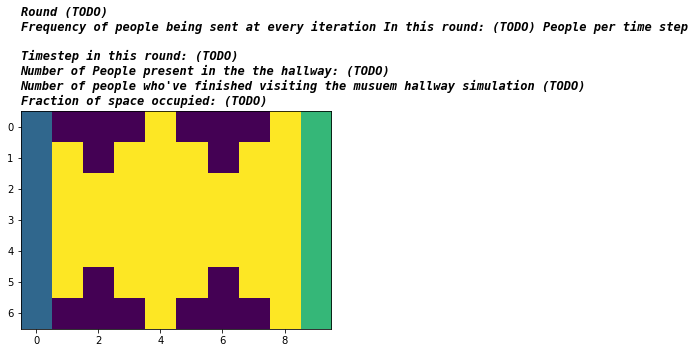

In [2]:
## Creating the board
board_dim = (7, 10)
board = np.zeros(board_dim)
board[:, -1] = -1
board[:, 0] = -2
## Exhibit 1:
board[0,1:4] = -3
board[1,2] = -3
## Exhibit 2:
board[0,5:8] = -3
board[1,6] = -3
## Exhibit 3:
board[-1,1:4] = -3
board[-2,2] = -3
## Exhibit 4:
board[-1,5:8] = -3
board[-2,6] = -3


ex0c = (0,2)
ex1c = (0,6)
ex2c = (6, 2)
ex3c = (6, 6)
## Making the exhibits ex0 to ex3:
ex0 = Exhibit(ex0c, 0)
ex1 = Exhibit(ex1c, 1)
ex2 = Exhibit(ex2c, 2)
ex3 = Exhibit(ex3c, 3)
exhibits_lst = [ex0,ex1,ex2,ex3]

plt.imshow(board)
title_text = "Round (TODO)" + \
"\nFrequency of people being sent at every iteration In this round: (TODO) People per time step" + \
"\n" + \
"\nTimestep in this round: (TODO)" + \
"\nNumber of People present in the the hallway: (TODO)" + \
"\nNumber of people who've finished visiting the musuem hallway simulation (TODO)" + \
"\nFraction of space occupied: (TODO)" 
plt.title(title_text,fontsize='large',
    loc='left',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.show()
# plt.subtitle("Frequency of sending people []. \n hi")
board_org = board.copy()

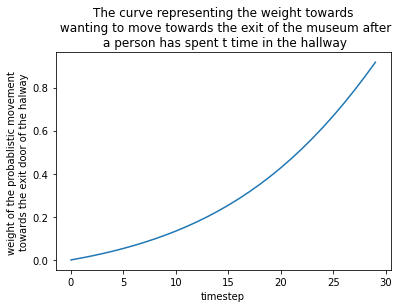

In [3]:
L = 4
b = 40
k = 0.09 
t = np.arange(0,30)
y = L/(1+b*np.exp(-k*t)) - L/(1+b)
plt.clf()
plt.plot(t, y)
plt.xlabel("timestep")
plt.ylabel("weight of the probablistic movement \ntowards the exit door of the halway")
plt.title("The curve representing the weight towards\n wanting to move towards the exit of the museum after\n a person has spent t time in the hallway")
plt.show()
# plt.savefig("Exiting weight progression.jpeg")

def calc_exit_pref(t): #t is time spent in the hallway
    return L/(1+b*np.exp(-k*t)) - (L/(1+b))*0.99 # to have sum of weight >=0
    

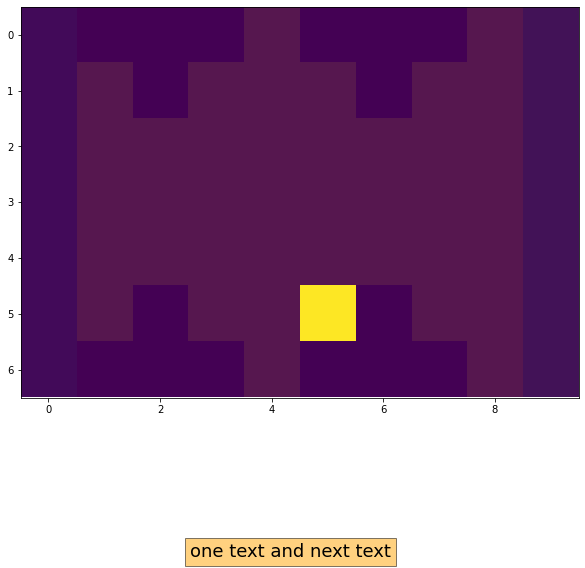

In [4]:
# @@ Cell 4 (RECOVERED):
#testing
# %matplotlib inline
# %matplotlib osx
plt_1 = plt.figure(figsize=(10, 10))
board2 = np.zeros(board_org.shape)
board2[5,5] = 10
plt.clf()
plt.imshow(board2)
plt.imshow(board_org, alpha=0.1)#, cmap="Greys")
# title_text = title_generator(1,2,3,4,5,6)
# plt.suptitle(title_text,fontsize='large',
#         wrap=True,
# #         loc='left',
#         fontweight='bold',
#         style='italic',
#         family='monospace')
plt.figtext(0.5, 0.01, "one text and next text", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()
# plt.savefig("./images/im-1.jpeg")

In [5]:
# @@ Cell 5 (RECOVERED):
people_placements = np.zeros(board_dim) # 1 or 0 based on whether occupied or not --> #sunsetting this
people_present_lst = []
people_done_lst = [] #list of people who've successfully finished the simulation
roundNum = 1
freq = 3 #frequency of sending f people per iteration (TOCHANGE)
timesteps = 100
round_num = 0
occupied_value = 10

def title_generator(roundNum, freq, timestep, numPresent, numFinished, fracSpaceOcc):
    title_text = f"Round {roundNum}" + \
f"\nFrequency of people being sent at every iteration In this round: {freq} People per time step" + \
"\n" + \
f"\nTimestep in this round: {timestep}" + \
f"\nNumber of People present in the the hallway: {numPresent}" + \
f"\nNumber of people who've finished visiting the musuem hallway simulation {numFinished}" + \
f"\nFraction of space occupied: {fracSpaceOcc}" 
    return title_text
# print(title_generator(1,2,3,4,5,6))
def numPresentCounter(board):
    return np.count_nonzero(board == occupied_value)

In [6]:
for freq in range(2,7+1):
    # @@ Cell 6 (RECOVERED):
    plt.rcParams["figure.figsize"] = (10, 10)
    board = np.zeros(board_org.shape) #reset the board
    %matplotlib osx
    ## %matplotlib osx
    ## %matplotlib inline
    get_ipython().run_line_magic('matplotlib', 'osx')
    from matplotlib.animation import FFMpegWriter
    metadata = dict(title='CrowdSim', artist='Matplotlib',comment='Maryam Azmandian 2022')
    writer = FFMpegWriter(fps=15, metadata=metadata)
    fig = plt.figure()
    with writer.saving(fig, f"FREQ{freq} crowdsim.mp4", dpi=200):

        ## grab the first frame
        plt.clf()
        plt.rcParams["figure.figsize"] = (10, 10)
    #     plt.imshow(board_org)
    # #     plt.imshow(board, alpha=0.5)#, cmap="Greys")
        title_text = title_generator(roundNum, freq, 0, 0, 0, 0)
        title_text0 = title_text.split('\n\n')[0]
        plt.suptitle(title_text0,fontsize='large',
            wrap=True,
    #         loc='left',
            fontweight='bold',
            style='italic',
            family='monospace')
        #"\n\n\n\n\n\n\n\n\n\n"
    #     plt.figtext(0.5, 0.01, title_text, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":10})
        title_text = title_text.split('\n\n')[1]
        plt.figtext(0.5, 0.01, title_text, ha="center", wrap=True, fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":40})

        plt.imshow(board)
        plt.imshow(board_org, alpha=0.1)#, cmap="Greys")
        plt.show()
    #     plt.savefig("./images/im0.jpeg")
        plt.draw()
        plt.pause(0.05)
        writer.grab_frame()
        ## grab the first frame
        for t in range(timesteps):
            if (t%10==0): print(t,end='')
            print('.',end='')


            #logic here

            # step 1: create people to be entering
            people_created = []
            for i in range(freq):
                p = Person()
                p.set_loc(i,9)
                #people_placements[i,9] = 1 #sunsetting this line
                board[i, 9] = occupied_value
                people_created.append(p)
                people_present_lst.append(p)


            # step 2: have them decide to move, handle exit logic
            for p in people_present_lst:
                pref_weights = []
                for exh in exhibits_lst:
                    distance = dist(p.get_loc(), exh.get_loc())
                    if distance <=1: # check if being visited
                        p.visited.append(exh)
                    if exh not in p.visited:
                        pref = np.dot(p.get_interests(), ex0.get_genres())
                        pref += 1/distance # no danger of div by zero error here
                    else:
                        pref = 0
                    pref_weights.append(pref)
                exit_pref = calc_exit_pref(p.timeSpent) #to make sure non_negative
                pref_weights.append(exit_pref)
                choice = random.choices(exhibits_lst + [0], weights=pref_weights, k=1)[0] #0 denotes choice of exit path
                (curX, curY) = p.get_loc()
                if choice == 0: #decide to move towards the exit
                    (toX, toY) = (curX, (curY-1)%board.shape[1]) # then want to move to the left after checking occupancy

                    if board[toX, toY] != occupied_value:
                        board[curX, curY] = 0
                        board[toX, toY] = occupied_value
                        p.set_loc(toX,toY)
                else: #choice is an exhibit obj, we need to move towards a loc
                    (exhX, exhY) = choice.get_loc()
                    x_adder = ((exhX < curX) * -1) + ((exhX > curX) * 1 )
                    y_adder = ((exhY < curY) * -1) + ((exhY > curY) * 1 )
                    (toX, toY) = (curX, curY)
                    if board[x_adder+curX,curY] != occupied_value:
                        (toX, toY) = (x_adder+curX,curY)
                    elif board[curX, y_adder + curY] != occupied_value:
                        (toX, toY) = (curX, y_adder + curY)
                    #otherwise stay in place.
                    if (toX, toY) != (curX, curY):
                        board[curX, curY] = 0
                        board[toX, toY] = occupied_value
                        p.set_loc(toX,toY)



                if p.get_y == 0: #if we're at the exit
                    (curX, curY) = p.get_loc()
                    board[curX, curY] = 0
                    people_done_lst.append(p)
                    p.set_loc((-1,-1)) #update p's loc to being outside the hallway

                    #can add working towards the exit as a preference too!!!
                    #logistics growth for time: y = L/(1+b*exp(-kt))


            #remove people who've exited from the people present in the hallway
            set1 = set(people_present_lst)
            set2 = set(people_done_lst)
            people_present_lst = list(set1 - set2)



    #         plt.figure(figsize = (10,10))
    #         plt.imshow(img_1)
    #         plt.imshow(img_2, alpha=0.5)

            plt.clf()
            plt.rcParams["figure.figsize"] = (10, 10)
    # #         plt.imshow(board_org)
    #         plt.imshow(board, alpha=0.5, cmap="Greys")
            plt.imshow(board)
            plt.imshow(board_org, alpha=0.1)#, cmap="Greys")
            numPresent = len(people_present_lst)
            fracSpaceOcc = numPresentCounter(board)/board.size#len(people_present_lst)/board.size
            if fracSpaceOcc>0.99:
                print("CROWDCRUSH OCCURED!")
                break;
            title_text = title_generator(roundNum, freq, t, numPresent, len(people_done_lst), fracSpaceOcc)
            title_text0 = title_text.split('\n\n')[0]
            plt.suptitle(title_text0,fontsize='large',
            wrap=True,
    #         loc='left',
            fontweight='bold',
            style='italic',
            family='monospace')
            title_text = title_text.split('\n\n')[1]
            plt.figtext(0.5, 0.01, title_text, ha="center", wrap=True, fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":40})
            plt.show()
    #         plt.savefig(f"./images/im{t}.jpeg")
            plt.draw()
            plt.pause(0.05)
            writer.grab_frame()


0.Person with ID 140489829168848 generated! Interests: [0.22727555 0.51602772 0.80700811 0.17549678]
Person with ID 140489798293296 generated! Interests: [0.02998725 0.60709723 0.45987128 0.64734236]
.Person with ID 140489826521040 generated! Interests: [0.20473335 0.09174404 0.65720443 0.71954821]
Person with ID 140489826520896 generated! Interests: [0.58088956 0.66752232 0.44476748 0.13843107]
.Person with ID 140489826334224 generated! Interests: [0.18562193 0.20049619 0.71338175 0.64531562]
Person with ID 140489826663584 generated! Interests: [0.38683259 0.72276452 0.19708226 0.53770865]
.Person with ID 140489755224672 generated! Interests: [0.27175986 0.35329989 0.56663933 0.69299757]
Person with ID 140489829169232 generated! Interests: [0.56315756 0.62039941 0.54561939 0.01605076]
.Person with ID 140489827270416 generated! Interests: [0.80008579 0.33708642 0.49365786 0.05037247]
Person with ID 140489827269264 generated! Interests: [0.9172212  0.12657071 0.2397278  0.29191729]
.Per

.Person with ID 140489430903200 generated! Interests: [0.48371595 0.22042846 0.30830085 0.78891113]
Person with ID 140489827470160 generated! Interests: [0.64733271 0.43721363 0.07262889 0.62010455]
.Person with ID 140489827510928 generated! Interests: [0.64527991 0.57978214 0.31776067 0.38274621]
Person with ID 140489827509824 generated! Interests: [0.30202059 0.58348805 0.22196031 0.72045741]
.Person with ID 140489579108144 generated! Interests: [0.87830412 0.1272123  0.03199572 0.45975556]
Person with ID 140489579172960 generated! Interests: [0.5384885  0.76837532 0.24804195 0.24104913]
.Person with ID 140489430903584 generated! Interests: [0.10180756 0.81651094 0.45910477 0.33491478]
Person with ID 140489827269600 generated! Interests: [0.88076733 0.10623933 0.43098023 0.16497927]
.Person with ID 140489579174448 generated! Interests: [0.24145221 0.12977614 0.58107884 0.76629391]
Person with ID 140489827268064 generated! Interests: [0.03733894 0.45966489 0.63653054 0.61817705]
.Pers

.Person with ID 140489640033344 generated! Interests: [0.22899511 0.66473282 0.56323815 0.43411323]
Person with ID 140489640032960 generated! Interests: [0.06521721 0.15977314 0.81390902 0.55477146]
.Person with ID 140489428513312 generated! Interests: [0.28049918 0.36694066 0.42924615 0.77615882]
Person with ID 140489428515808 generated! Interests: [0.67048367 0.34765101 0.03444276 0.65452588]
.Person with ID 140489579175744 generated! Interests: [0.0215867  0.81622982 0.32496088 0.4771827 ]
Person with ID 140489579175888 generated! Interests: [0.49125743 0.34578854 0.46325948 0.65152673]
.Person with ID 140489827184112 generated! Interests: [0.72035201 0.45437738 0.4655882  0.24054482]
Person with ID 140489827182672 generated! Interests: [0.355644   0.32021082 0.46072684 0.74747117]
.Person with ID 140489428514560 generated! Interests: [0.98974872 0.09123476 0.07135186 0.08356196]
Person with ID 140489826663008 generated! Interests: [0.51525591 0.00644502 0.81899746 0.25241428]
.Pers

.Person with ID 140489827300064 generated! Interests: [0.65749957 0.02854341 0.58037063 0.47963478]
Person with ID 140489827299920 generated! Interests: [0.57264667 0.7795506  0.15100141 0.20390004]
Person with ID 140489579066128 generated! Interests: [0.71614597 0.34045672 0.0415129  0.60786582]
.Person with ID 140489450699552 generated! Interests: [0.4361378  0.24304366 0.7176677  0.48545511]
Person with ID 140489640079664 generated! Interests: [0.31941975 0.49513925 0.08203008 0.80379053]
Person with ID 140489450699120 generated! Interests: [0.85197524 0.13810033 0.06195886 0.50122609]
.Person with ID 140488669874928 generated! Interests: [0.5525608  0.66063797 0.49312526 0.12272537]
Person with ID 140489579235840 generated! Interests: [0.63302769 0.4295119  0.59851433 0.23785725]
Person with ID 140489579236128 generated! Interests: [0.6426668  0.29520612 0.35382011 0.61208174]
20.Person with ID 140488670019008 generated! Interests: [0.56303289 0.79337411 0.16069526 0.16651883]
Pers

.Person with ID 140489826383040 generated! Interests: [0.15915115 0.55624766 0.4011046  0.71019332]
Person with ID 140489829013200 generated! Interests: [0.24761566 0.37892801 0.65354915 0.60660824]
Person with ID 140489829014544 generated! Interests: [0.71136557 0.38810037 0.56041069 0.17110521]
.Person with ID 140489826477920 generated! Interests: [0.1611661  0.7659853  0.54946668 0.29219577]
Person with ID 140489826333216 generated! Interests: [0.30463346 0.10169991 0.50228354 0.80284919]
Person with ID 140489826332784 generated! Interests: [0.14209285 0.74964421 0.64639514 0.00406321]
.Person with ID 140489826680592 generated! Interests: [0.78199949 0.18824656 0.46240548 0.37312358]
Person with ID 140489826678480 generated! Interests: [0.65155227 0.02730657 0.53455209 0.53757609]
Person with ID 140489827325024 generated! Interests: [0.69890257 0.54226604 0.13368926 0.44677726]
.Person with ID 140489755310448 generated! Interests: [0.69326803 0.21204176 0.24848613 0.64239581]
Person

.Person with ID 140489827570160 generated! Interests: [0.32968062 0.64998059 0.10086362 0.67724623]
Person with ID 140489826296688 generated! Interests: [0.72224978 0.62612495 0.01758505 0.29328071]
Person with ID 140489640015472 generated! Interests: [0.45021825 0.41831651 0.74455031 0.26069072]
.Person with ID 140489579300224 generated! Interests: [0.19965814 0.04303821 0.45106318 0.86880743]
Person with ID 140489579302096 generated! Interests: [0.71459944 0.50986052 0.00325572 0.47893558]
Person with ID 140489579299264 generated! Interests: [0.66118184 0.72626921 0.07707745 0.1715537 ]
.Person with ID 140489579129008 generated! Interests: [0.36084059 0.1757991  0.74561414 0.53192885]
Person with ID 140489579130496 generated! Interests: [0.22340113 0.21016514 0.79389026 0.5250341 ]
Person with ID 140488669841632 generated! Interests: [0.42814358 0.29400804 0.60510903 0.60340319]
.Person with ID 140489826518448 generated! Interests: [0.02742402 0.34330609 0.72437918 0.59721324]
Person

.Person with ID 140489831623408 generated! Interests: [0.47247736 0.55047631 0.55129139 0.41209075]
Person with ID 140489798400176 generated! Interests: [0.39414828 0.28042499 0.52135735 0.70299038]
Person with ID 140489579386816 generated! Interests: [0.7759298  0.20769639 0.57671656 0.1489737 ]
Person with ID 140489579386144 generated! Interests: [0.95062054 0.02662303 0.23461969 0.20140854]
.Person with ID 140489428516336 generated! Interests: [0.61838643 0.23943734 0.66619448 0.34125197]
Person with ID 140489826334896 generated! Interests: [0.42797966 0.59856633 0.58150251 0.34699652]
Person with ID 140489826335952 generated! Interests: [0.37975057 0.47331917 0.58282125 0.54044228]
Person with ID 140489579107328 generated! Interests: [0.00448067 0.11888556 0.4972659  0.85940256]
.Person with ID 140489826664304 generated! Interests: [0.78359594 0.28315564 0.36423242 0.41609497]
Person with ID 140489827010784 generated! Interests: [0.58108091 0.19325869 0.56478771 0.55318252]
Person 

.Person with ID 140489827063792 generated! Interests: [0.28965122 0.62568005 0.08180032 0.71967726]
Person with ID 140489825900576 generated! Interests: [0.63853739 0.35858938 0.48362412 0.47936558]
Person with ID 140489825438256 generated! Interests: [0.51241926 0.49633027 0.61651136 0.33316139]
Person with ID 140489825438112 generated! Interests: [0.02184099 0.70849192 0.34329765 0.61620524]
.Person with ID 140489579415968 generated! Interests: [0.46016435 0.83582119 0.03043522 0.2978681 ]
Person with ID 140489829124608 generated! Interests: [0.65245644 0.01370687 0.75584173 0.05306597]
Person with ID 140489829124128 generated! Interests: [0.17047398 0.42755594 0.62934705 0.62614441]
Person with ID 140488669856768 generated! Interests: [0.12570936 0.65546925 0.58676357 0.45854742]
.Person with ID 140488702110016 generated! Interests: [0.26809152 0.64061751 0.59700341 0.40165043]
Person with ID 140488702110928 generated! Interests: [0.60179499 0.36828688 0.70635678 0.05716355]
Person 

.Person with ID 140489827395088 generated! Interests: [0.78249398 0.26156702 0.33427716 0.45557067]
Person with ID 140488669839712 generated! Interests: [0.63200785 0.24807668 0.71199137 0.17914331]
Person with ID 140488669874208 generated! Interests: [0.28700417 0.56665838 0.30283405 0.71050575]
Person with ID 140488669875696 generated! Interests: [0.54240731 0.5682883  0.48356074 0.38602036]
.Person with ID 140489430796848 generated! Interests: [0.76674717 0.54210449 0.33693462 0.06853152]
Person with ID 140489430798240 generated! Interests: [0.38552897 0.41896935 0.72698199 0.38383496]
Person with ID 140489579151856 generated! Interests: [0.65249602 0.52875827 0.02405257 0.54229614]
Person with ID 140489579154832 generated! Interests: [0.22977279 0.55812797 0.51316545 0.61021213]
.Person with ID 140489829048272 generated! Interests: [0.51392871 0.40839378 0.45941357 0.5983569 ]
Person with ID 140489826297744 generated! Interests: [0.70206939 0.39965532 0.26990272 0.52395298]
Person 

.Person with ID 140488669846640 generated! Interests: [0.10161125 0.77189656 0.57363471 0.25454681]
Person with ID 140489579152576 generated! Interests: [0.7798646  0.24286992 0.19704735 0.54221559]
Person with ID 140489579154352 generated! Interests: [0.43971759 0.52167231 0.34986007 0.64195356]
Person with ID 140489579153680 generated! Interests: [0.64562323 0.05929592 0.65856764 0.38202527]
.Person with ID 140489450698880 generated! Interests: [0.76736623 0.03591233 0.56992432 0.29162586]
Person with ID 140489579107712 generated! Interests: [0.69321229 0.54398683 0.42975751 0.19708761]
Person with ID 140489579110256 generated! Interests: [0.37761539 0.58804865 0.57374293 0.42711176]
Person with ID 140489579108048 generated! Interests: [0.16033747 0.95110513 0.21572379 0.15216499]
.Person with ID 140489754892560 generated! Interests: [0.52026321 0.55733433 0.12440526 0.63500233]
Person with ID 140489826299424 generated! Interests: [0.23613684 0.09792404 0.81757879 0.51596047]
Person 

.Person with ID 140488702175936 generated! Interests: [0.26439062 0.58737785 0.20604606 0.73663416]
Person with ID 140488702175408 generated! Interests: [0.17987139 0.55656824 0.5811998  0.56576043]
Person with ID 140488669847120 generated! Interests: [0.36011244 0.40887203 0.20453529 0.81320846]
Person with ID 140488669846928 generated! Interests: [0.26081298 0.73153331 0.13791781 0.614666  ]
.Person with ID 140488669859744 generated! Interests: [0.73362151 0.26903907 0.43890372 0.44360003]
Person with ID 140489450868944 generated! Interests: [0.48441073 0.47035204 0.44178974 0.59070892]
Person with ID 140488702316944 generated! Interests: [0.46451685 0.36943046 0.62857742 0.50262875]
Person with ID 140488702222448 generated! Interests: [0.53573848 0.31469337 0.1047644  0.7765158 ]
.Person with ID 140489826299616 generated! Interests: [0.55585915 0.46702091 0.58735966 0.35766004]
Person with ID 140489430748464 generated! Interests: [0.52867496 0.45122438 0.13802703 0.70558337]
Person 

.Person with ID 140489428364784 generated! Interests: [0.92977727 0.16460481 0.32910762 0.01037615]
Person with ID 140489428364112 generated! Interests: [0.76646616 0.17332745 0.58531953 0.1997205 ]
Person with ID 140489428364592 generated! Interests: [0.27904313 0.42909705 0.83117255 0.2171701 ]
Person with ID 140489825925248 generated! Interests: [0.63909184 0.09734016 0.12098533 0.75329215]
Person with ID 140489825925728 generated! Interests: [0.48302011 0.28824326 0.63389309 0.53083609]
.Person with ID 140489825923712 generated! Interests: [0.54935052 0.2603174  0.66656609 0.43143771]
Person with ID 140489826519168 generated! Interests: [0.47467011 0.55382586 0.37856754 0.56978226]
Person with ID 140489826518544 generated! Interests: [0.12704457 0.75926848 0.27930079 0.5739008 ]
Person with ID 140488702178112 generated! Interests: [0.19493538 0.49002914 0.43977268 0.72696054]
Person with ID 140488669805824 generated! Interests: [0.39400335 0.60581802 0.42167241 0.54766621]
.Person 

.Person with ID 140488369518768 generated! Interests: [0.05609561 0.31258424 0.705407   0.63367605]
Person with ID 140488430021264 generated! Interests: [0.19924706 0.48373292 0.63700284 0.5661541 ]
Person with ID 140488369318928 generated! Interests: [0.61998695 0.51785339 0.04989488 0.58732831]
Person with ID 140488369319360 generated! Interests: [0.46443348 0.03879553 0.02528735 0.8843964 ]
Person with ID 140488369318160 generated! Interests: [0.64167405 0.45783947 0.37212721 0.49005997]
.Person with ID 140488669824288 generated! Interests: [0.42612858 0.60372077 0.53653052 0.40751769]
Person with ID 140489579415440 generated! Interests: [0.95601084 0.10043331 0.2238888  0.16071784]
Person with ID 140489579415200 generated! Interests: [0.68109036 0.48606992 0.52066474 0.16958829]
Person with ID 140489579414912 generated! Interests: [0.71876637 0.37550387 0.48192825 0.33183868]
Person with ID 140488669841536 generated! Interests: [0.6083511  0.27879257 0.71053983 0.21752423]
.Person 

.Person with ID 140488593900640 generated! Interests: [0.35967709 0.14897499 0.87941773 0.27397683]
Person with ID 140489826382032 generated! Interests: [0.6334424  0.53433376 0.35334561 0.43403346]
Person with ID 140489826382464 generated! Interests: [0.86303331 0.09837207 0.48673791 0.0926426 ]
Person with ID 140489826385344 generated! Interests: [0.21024322 0.7978538  0.1390117  0.54763386]
Person with ID 140488369377680 generated! Interests: [0.60558094 0.49020692 0.32906462 0.53355916]
40.Person with ID 140489428552048 generated! Interests: [0.10129082 0.20284473 0.68996116 0.68742111]
Person with ID 140488669939936 generated! Interests: [0.33022632 0.168387   0.8942499  0.25082566]
Person with ID 140488669940272 generated! Interests: [0.51638937 0.77179162 0.28603804 0.23635132]
Person with ID 140488593835200 generated! Interests: [0.65449104 0.44081354 0.45638519 0.41114165]
Person with ID 140488593835152 generated! Interests: [0.138499   0.15036946 0.56039737 0.80259694]
.Perso

.Person with ID 140488429911536 generated! Interests: [0.38123901 0.46643428 0.54682298 0.58144691]
Person with ID 140488369493712 generated! Interests: [0.49628989 0.58672448 0.08855837 0.6337256 ]
Person with ID 140488369495344 generated! Interests: [0.71889112 0.23911768 0.17550309 0.62866283]
Person with ID 140488429982000 generated! Interests: [0.19129683 0.43361607 0.59800392 0.64635435]
Person with ID 140488429981952 generated! Interests: [0.73815861 0.64566671 0.00797112 0.19537867]
.Person with ID 140488670007648 generated! Interests: [0.259528   0.07025184 0.92758303 0.2594217 ]
Person with ID 140488670007696 generated! Interests: [0.73345711 0.10866751 0.1247125  0.65930178]
Person with ID 140488132939584 generated! Interests: [0.30310667 0.32102584 0.86622868 0.23391587]
Person with ID 140488132937856 generated! Interests: [0.04093116 0.63509825 0.37514305 0.67397519]
Person with ID 140488369468944 generated! Interests: [0.6854113  0.37298621 0.09414806 0.61824653]
.Person 

.Person with ID 140489826699728 generated! Interests: [0.37043664 0.37122661 0.46114193 0.71576226]
Person with ID 140489826354560 generated! Interests: [0.62421961 0.40218795 0.26840401 0.61363998]
Person with ID 140488594022208 generated! Interests: [0.596615   0.35047704 0.60838518 0.38869507]
Person with ID 140488594020576 generated! Interests: [0.1389924  0.33579926 0.70979012 0.60342187]
Person with ID 140489754892944 generated! Interests: [0.7052192  0.32428624 0.22606225 0.58855771]
.Person with ID 140489825531648 generated! Interests: [0.57957859 0.41639324 0.38486391 0.58530769]
Person with ID 140489825923232 generated! Interests: [0.61163781 0.36692045 0.24126594 0.65807243]
Person with ID 140489825924480 generated! Interests: [0.06266419 0.68640752 0.65352905 0.31275822]
Person with ID 140489825924432 generated! Interests: [0.34072616 0.46467835 0.44369217 0.68637961]
Person with ID 140488702318096 generated! Interests: [0.73038935 0.10152605 0.02400318 0.67501682]
.Person 

90.Person with ID 140489428600816 generated! Interests: [0.03536298 0.01807629 0.98400701 0.17364592]
Person with ID 140489829046688 generated! Interests: [0.56904881 0.45712447 0.52551576 0.43709707]
Person with ID 140489829047792 generated! Interests: [0.17251831 0.56355357 0.66559204 0.45785592]
Person with ID 140489829045536 generated! Interests: [0.48953389 0.5433408  0.06878728 0.67853199]
Person with ID 140489428459680 generated! Interests: [0.36220009 0.6098535  0.21089736 0.67261586]
.Person with ID 140488702110736 generated! Interests: [0.63074266 0.38905187 0.26104317 0.61859421]
Person with ID 140489450829664 generated! Interests: [0.60838672 0.53499081 0.05736266 0.58340377]
Person with ID 140488702111696 generated! Interests: [0.03519116 0.0883114  0.96370408 0.24947371]
Person with ID 140489579154400 generated! Interests: [0.28168177 0.55040371 0.73916204 0.26711535]
Person with ID 140489430848320 generated! Interests: [0.4517233  0.03667918 0.75115781 0.47996109]
.Perso

.Person with ID 140489754894096 generated! Interests: [0.0268039  0.17204037 0.66962329 0.72200299]
Person with ID 140488669840768 generated! Interests: [0.52949562 0.5594421  0.63644398 0.03997485]
Person with ID 140489826383472 generated! Interests: [0.47269302 0.14353694 0.59142289 0.6373205 ]
Person with ID 140489826383712 generated! Interests: [0.8065846  0.39155259 0.42606792 0.12072277]
Person with ID 140489826382560 generated! Interests: [0.06427655 0.13507518 0.30782546 0.93960987]
Person with ID 140489829169184 generated! Interests: [0.56977412 0.77375087 0.0297703  0.27528308]
.Person with ID 140489828212352 generated! Interests: [0.66337579 0.70768546 0.24295084 0.00941979]
Person with ID 140488702180608 generated! Interests: [0.57189857 0.5109619  0.54651598 0.33640786]
Person with ID 140489825687104 generated! Interests: [0.70259237 0.2916713  0.00816677 0.64901858]
Person with ID 140489825688016 generated! Interests: [0.01467253 0.66649392 0.54012091 0.51365355]
Person w

20.Person with ID 140488593902080 generated! Interests: [0.3954739  0.74804065 0.46888369 0.25334497]
Person with ID 140488702165248 generated! Interests: [0.78161944 0.49591589 0.34775178 0.14902076]
Person with ID 140488702168080 generated! Interests: [2.84362697e-01 5.04453535e-04 3.75130561e-01 8.82278111e-01]
Person with ID 140488702166208 generated! Interests: [0.52993172 0.37412599 0.37507163 0.66221098]
Person with ID 140488594020096 generated! Interests: [0.70612475 0.44629748 0.20040647 0.51190198]
Person with ID 140488594019808 generated! Interests: [0.26609922 0.20499619 0.02820016 0.94147359]
.Person with ID 140489428451536 generated! Interests: [0.58379536 0.6522915  0.20067929 0.4398029 ]
Person with ID 140489827303184 generated! Interests: [0.76143559 0.57862478 0.2701911  0.11138211]
Person with ID 140489827299632 generated! Interests: [0.56536769 0.38088724 0.72940738 0.05700141]
Person with ID 140489430847648 generated! Interests: [0.50197041 0.82511378 0.25861105 0.

.Person with ID 140488429949520 generated! Interests: [0.27025436 0.35152507 0.75161046 0.48833842]
Person with ID 140489825436384 generated! Interests: [0.66726483 0.53569145 0.19841243 0.4779381 ]
Person with ID 140489825436144 generated! Interests: [0.59226869 0.48947629 0.47539164 0.42852485]
Person with ID 140489825439360 generated! Interests: [0.34892248 0.23582466 0.61915777 0.66278465]
Person with ID 140489825437008 generated! Interests: [0.38463295 0.61614982 0.68492301 0.05742265]
Person with ID 140489825437440 generated! Interests: [0.49561323 0.25547428 0.27648183 0.78272487]
.Person with ID 140489826699440 generated! Interests: [0.58561374 0.3076273  0.12764088 0.73900595]
Person with ID 140489826700112 generated! Interests: [0.39614098 0.48331333 0.59099749 0.5101005 ]
Person with ID 140489428552768 generated! Interests: [0.18384325 0.08458742 0.97925352 0.01044849]
Person with ID 140489428550464 generated! Interests: [0.2014871  0.86069757 0.44696679 0.13719816]
Person w

.Person with ID 140489430739696 generated! Interests: [0.0787926  0.14817575 0.63503047 0.75403712]
Person with ID 140488593836256 generated! Interests: [0.4129937  0.53570703 0.46097387 0.57441907]
Person with ID 140488133097840 generated! Interests: [0.31934507 0.69513932 0.64139456 0.05842155]
Person with ID 140489829123408 generated! Interests: [0.04577853 0.51755372 0.76736969 0.37574756]
Person with ID 140489829122400 generated! Interests: [0.58402241 0.30607496 0.38457854 0.64601493]
Person with ID 140489829125088 generated! Interests: [0.7075263  0.56146364 0.41258712 0.11805501]
.Person with ID 140488702132672 generated! Interests: [0.79027567 0.36290262 0.47963587 0.11711313]
Person with ID 140488101207584 generated! Interests: [0.51715289 0.15316258 0.84027517 0.05506136]
Person with ID 140488101205712 generated! Interests: [0.76757013 0.14011903 0.53586041 0.32257772]
Person with ID 140488101206624 generated! Interests: [0.67852728 0.56056339 0.16859698 0.44378425]
Person w

.Person with ID 140489827302224 generated! Interests: [0.43765336 0.64896434 0.05272272 0.62010091]
Person with ID 140489827301312 generated! Interests: [0.66900352 0.46278012 0.33887271 0.4726882 ]
Person with ID 140489450869328 generated! Interests: [0.55115795 0.60347449 0.53662757 0.2099388 ]
Person with ID 140489450869568 generated! Interests: [0.42232597 0.18786436 0.27984945 0.8414464 ]
Person with ID 140489428454560 generated! Interests: [0.33881746 0.52339723 0.29971144 0.72210188]
Person with ID 140488669839904 generated! Interests: [0.64547587 0.2057877  0.0017236  0.73553338]
.Person with ID 140488669940128 generated! Interests: [0.53635743 0.51646477 0.41953063 0.51920989]
Person with ID 140489798638032 generated! Interests: [0.65009761 0.54808405 0.27065819 0.45135476]
Person with ID 140489798636016 generated! Interests: [0.39281153 0.10922672 0.76219311 0.50282232]
Person with ID 140489798637600 generated! Interests: [0.68935485 0.26701223 0.57945833 0.34310699]
Person w

.Person with ID 140489579153440 generated! Interests: [0.16813837 0.30076489 0.42980275 0.83458946]
Person with ID 140489828953728 generated! Interests: [0.22091766 0.7155946  0.3422919  0.56741168]
Person with ID 140489828953872 generated! Interests: [0.43237057 0.35316873 0.10715876 0.82270562]
Person with ID 140489828950944 generated! Interests: [0.58775656 0.18241994 0.73740641 0.27838279]
Person with ID 140488669846832 generated! Interests: [0.39317341 0.73284729 0.55478639 0.02369773]
Person with ID 140488669847264 generated! Interests: [0.1734694  0.67256773 0.49118458 0.52564126]
.Person with ID 140488429983776 generated! Interests: [0.49071774 0.19442521 0.4071319  0.74541167]
Person with ID 140488429982816 generated! Interests: [0.28226121 0.66494895 0.49025154 0.48767298]
Person with ID 140489826334512 generated! Interests: [0.52534046 0.50642394 0.34156836 0.59235399]
Person with ID 140489826332976 generated! Interests: [0.07429914 0.73473425 0.30555844 0.6010651 ]
Person w

90.Person with ID 140488429883200 generated! Interests: [0.51320482 0.16390763 0.02655312 0.84205108]
Person with ID 140488429881904 generated! Interests: [0.62491511 0.47226757 0.61181941 0.11009749]
Person with ID 140488101167696 generated! Interests: [0.55608296 0.55439802 0.14094797 0.60294962]
Person with ID 140488101169136 generated! Interests: [0.8123592  0.56629565 0.02897124 0.13617062]
Person with ID 140488101169568 generated! Interests: [0.3782279  0.45124905 0.77804464 0.21900798]
Person with ID 140488101168944 generated! Interests: [0.58782724 0.60247596 0.20044986 0.50130001]
.Person with ID 140489579399104 generated! Interests: [0.36134979 0.03872916 0.60408429 0.70923095]
Person with ID 140488101206000 generated! Interests: [0.88286082 0.31151551 0.2776491  0.21546655]
Person with ID 140488128610464 generated! Interests: [0.73573243 0.26235827 0.59200366 0.19848828]
Person with ID 140488128611952 generated! Interests: [0.54496507 0.69586565 0.45685193 0.10035125]
Person

.Person with ID 140489827219488 generated! Interests: [0.43319479 0.60394869 0.05337626 0.66688772]
Person with ID 140488670001712 generated! Interests: [0.31238525 0.72329331 0.32165742 0.52516546]
Person with ID 140489828951376 generated! Interests: [0.66174887 0.32229598 0.29261582 0.61040128]
Person with ID 140489826699680 generated! Interests: [0.42657683 0.41607508 0.66184685 0.45483237]
Person with ID 140489826698480 generated! Interests: [0.41848602 0.57953322 0.35845665 0.60043278]
Person with ID 140489826700976 generated! Interests: [0.02348699 0.26457348 0.73275012 0.62651935]
Person with ID 140489826700064 generated! Interests: [0.64206619 0.62687176 0.22210192 0.38138371]
.Person with ID 140489640079712 generated! Interests: [0.22480134 0.51319462 0.62200977 0.54699131]
Person with ID 140489825574144 generated! Interests: [0.4920728  0.53641654 0.43189188 0.53253268]
Person with ID 140488132915648 generated! Interests: [0.37087308 0.60077969 0.65259946 0.27501068]
Person w

.Person with ID 140489430901904 generated! Interests: [0.5658409  0.56497768 0.59459785 0.08412901]
Person with ID 140488593901648 generated! Interests: [0.4563486  0.64224612 0.13789347 0.60020935]
Person with ID 140489829124800 generated! Interests: [0.47917455 0.03154735 0.61358466 0.62682564]
Person with ID 140488133115472 generated! Interests: [0.26142068 0.72044389 0.21712514 0.60454653]
Person with ID 140488133114848 generated! Interests: [0.02255875 0.30412356 0.72586628 0.61653719]
Person with ID 140488133112160 generated! Interests: [0.6113445  0.66189376 0.1934566  0.38823844]
Person with ID 140489828210720 generated! Interests: [0.55161602 0.73140772 0.23522887 0.3246997 ]
.Person with ID 140489825688544 generated! Interests: [0.48731159 0.33450922 0.47365044 0.65290601]
Person with ID 140489825688496 generated! Interests: [0.31547151 0.6946699  0.27149702 0.58668631]
Person with ID 140489825686144 generated! Interests: [0.30830906 0.55714932 0.71726968 0.28293879]
Person w

.Person with ID 140488669774320 generated! Interests: [0.20068293 0.76336859 0.37215734 0.48835813]
Person with ID 140488108411632 generated! Interests: [0.79224731 0.03609689 0.32032922 0.51810271]
Person with ID 140488108412688 generated! Interests: [0.61107293 0.68712086 0.32443559 0.22180248]
Person with ID 140488108443440 generated! Interests: [0.48619876 0.59362396 0.63530992 0.08719326]
Person with ID 140488108442336 generated! Interests: [0.74206127 0.31079497 0.3971803  0.44158733]
Person with ID 140488108442288 generated! Interests: [0.51880676 0.71576212 0.46743957 0.00493725]
Person with ID 140488108441952 generated! Interests: [0.70213486 0.66174474 0.05153361 0.25776891]
.Person with ID 140488108444544 generated! Interests: [0.75112598 0.40579491 0.40916476 0.3220628 ]
Person with ID 140488132934000 generated! Interests: [0.59546805 0.47582609 0.57408036 0.29906364]
Person with ID 140488132932992 generated! Interests: [0.65518887 0.19749276 0.35370163 0.63766709]
Person w

40.Person with ID 140488132918432 generated! Interests: [0.39027255 0.40184585 0.63994529 0.52600121]
Person with ID 140489428513984 generated! Interests: [0.34909589 0.44052948 0.48458355 0.67025713]
Person with ID 140488702318528 generated! Interests: [0.72254029 0.30312356 0.50128736 0.36710027]
Person with ID 140488702318624 generated! Interests: [0.51494504 0.72966941 0.29529728 0.33943139]
Person with ID 140488702316800 generated! Interests: [0.5676043  0.67334914 0.47370915 0.00509272]
Person with ID 140488369492464 generated! Interests: [0.02061007 0.08466923 0.94112483 0.32663495]
Person with ID 140488369494144 generated! Interests: [0.23256856 0.71420106 0.32814839 0.57284147]
.Person with ID 140489829069248 generated! Interests: [0.80936441 0.57146265 0.11348054 0.07403962]
Person with ID 140489829014016 generated! Interests: [0.42547603 0.60891998 0.23267907 0.62773168]
Person with ID 140488369495824 generated! Interests: [0.53370152 0.72293475 0.21586886 0.38200613]
Person

.Person with ID 140489450699696 generated! Interests: [0.66850702 0.38045068 0.35638149 0.53042236]
Person with ID 140488429844464 generated! Interests: [0.43020485 0.89678594 0.09945371 0.02842038]
Person with ID 140488593991280 generated! Interests: [0.50590648 0.26081575 0.00423823 0.82220181]
Person with ID 140488593993200 generated! Interests: [0.02390117 0.83722335 0.53682686 0.1015023 ]
Person with ID 140488593993056 generated! Interests: [0.91895064 0.1913733  0.33112244 0.09624922]
Person with ID 140488593992672 generated! Interests: [0.58646467 0.29100327 0.14414307 0.74202362]
Person with ID 140489579129824 generated! Interests: [0.47335546 0.60383627 0.21905428 0.60276992]
.Person with ID 140488133044160 generated! Interests: [0.31050092 0.64716624 0.2734457  0.64030656]
Person with ID 140489579128480 generated! Interests: [0.56299801 0.2112259  0.66511284 0.44276605]
Person with ID 140489579129920 generated! Interests: [0.54860491 0.13852081 0.25600985 0.78377522]
Person w

.Person with ID 140488108410336 generated! Interests: [0.06700797 0.53926859 0.72844172 0.41721934]
Person with ID 140488108410864 generated! Interests: [0.12193464 0.60287002 0.60684527 0.50340689]
Person with ID 140488101288976 generated! Interests: [0.09758999 0.85370358 0.40990358 0.30601544]
Person with ID 140488101286144 generated! Interests: [0.79123244 0.16896894 0.58138454 0.08598103]
Person with ID 140488101288448 generated! Interests: [0.04428025 0.138636   0.12368765 0.98159089]
Person with ID 140488669999264 generated! Interests: [0.23806677 0.0953083  0.96098682 0.10365742]
Person with ID 140488369518432 generated! Interests: [0.23074149 0.75277412 0.29605416 0.54077853]
.Person with ID 140488369471248 generated! Interests: [0.63689144 0.37720591 0.65439888 0.1544251 ]
Person with ID 140488128504544 generated! Interests: [0.53852146 0.1246872  0.70207583 0.44892903]
Person with ID 140489450776704 generated! Interests: [0.23017718 0.49379258 0.61300426 0.57220026]
Person w

.Person with ID 140489825571888 generated! Interests: [0.12601478 0.75060498 0.39387032 0.51534319]
Person with ID 140489825689264 generated! Interests: [0.14476669 0.50296006 0.83611308 0.16428235]
Person with ID 140489825687248 generated! Interests: [0.44998836 0.493427   0.08540622 0.73942278]
Person with ID 140489825687536 generated! Interests: [0.34399227 0.77074385 0.51066881 0.16383101]
Person with ID 140488369396656 generated! Interests: [0.15849935 0.46737699 0.51004104 0.70448197]
Person with ID 140488594215120 generated! Interests: [0.75781163 0.28030695 0.02236997 0.58876917]
Person with ID 140488108377424 generated! Interests: [0.31886673 0.32207084 0.3629335  0.81417054]
.Person with ID 140488133106128 generated! Interests: [0.16778991 0.77629025 0.48627643 0.3643559 ]
Person with ID 140488108350960 generated! Interests: [0.18002441 0.70748123 0.55763992 0.39509397]
Person with ID 140489826354416 generated! Interests: [0.94158042 0.25457449 0.21708554 0.03862658]
Person w

.Person with ID 140488101833648 generated! Interests: [0.38144374 0.2162256  0.3334272  0.83460977]
Person with ID 140489428363968 generated! Interests: [0.45398154 0.56756758 0.33743664 0.59825104]
Person with ID 140488103753088 generated! Interests: [0.67137275 0.63225874 0.03369744 0.38519086]
Person with ID 140488101698816 generated! Interests: [0.36351472 0.05535436 0.86713755 0.33595447]
Person with ID 140488101698672 generated! Interests: [0.83070036 0.428062   0.0420123  0.35346118]
Person with ID 140488101698288 generated! Interests: [0.55741839 0.43423808 0.65747838 0.26161843]
Person with ID 140488369448512 generated! Interests: [0.25628004 0.67654762 0.11409032 0.68087243]
.Person with ID 140488103752320 generated! Interests: [0.17643923 0.28686718 0.67003199 0.66153878]
Person with ID 140489826383904 generated! Interests: [0.03529542 0.66979361 0.64177674 0.37182438]
Person with ID 140488133042336 generated! Interests: [0.79828886 0.06075977 0.29147977 0.52352907]
Person w

Notes to self:

- Make sure the start where we send people in works rigth, what if the start line is not empty --> TODO: Handle this
- Print Round number
- Timestep in this round
- Print Frequency of sending people in this set
- Number of people present
- Fraction of space occupied
- Number of people exited



## At each point, we want to let n number of people enter (TODO: EDIT)
### Ex: 7 people per round

## People's trajectory/calculation of priority scores will be a function of:
* Their interests alignment with exhibit topic(s)
* Whether they've seen an exhinit or not (don't consider it again once visited) (will go towards the exhibit with highest priority score)
* How long they've stayed in the simulation (Don't want to stay too long)
* 

## (+ rules and other specified constraints)
* Visiting/seeing/checking out an exhibit consists of being within 1 unit from their "center" ```ex[n]c```.
* Person seeing an exhibit for 1 iteration marks it as visited.

In [7]:
# plt.scatter([(1,2), (3,4)], alpha=0.5)
# plt.show()
((2 < 2) * -1) + ((2 > 2) * 1 )

0

In [8]:
# ?random.randint
# ?np.linalg.norm

# np.random.rand(4)


In [9]:
# import numpy as np
#?np.linalg.norm
#https://www.geeksforgeeks.org/how-to-get-weighted-random-choice-in-python/
import random
  

sampleList = [100, 200, 300, 400, 500]

randomList = random.choices(sampleList, weights=(10, 20, 30, 40, 50), k=1)[0]

print(randomList)


400


Further rules and possibilites to make a more intricate model:
* If seeing an exhibit, How long they've already been here (as opposed to fixed 1 iteration being considered visited)
* One person can only occupy a single block, and a single block can at most be occupied by one person

In [10]:
# from matplotlib.animation import FFMpegWriter
# metadata = dict(title='My first animation in 2D', artist='Matplotlib',comment='Wakanda is coming.')
# writer = FFMpegWriter(fps=15, metadata=metadata)
# fig = plt.figure()

# with writer.saving(fig, "wave1d.mp4", dpi=200):
#     nf = 100
#     for it in range(nf):
#         if (it%10==0): print(it,end='')
#         print('.',end='')

#         n = 50
#         y = np.zeros(n)
#         f = 2.0*np.pi/n
#         for i in range(n):
#             y[i] = np.cos(f*(i+it)) + np.sin(f*it)*np.cos(3*f*(i+it))
#         plt.clf()
#         plt.plot(y, 'ro-',mfc='w')
#         plt.show()
#         plt.draw()
#         plt.pause(0.05)
#         writer.grab_frame()

In [11]:
# # @@ Cell 11 (RECOVERED):
# #testing
# board2 = np.zeros(board_org.shape)
# board2[5,5] = 10
# plt.clf()
# plt.imshow(board_org)
# plt.imshow(board2, alpha=0.5, cmap="binary")
# plt.show()